## Skoltech
## Intro to data science, fall 2023
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach

## Each student has personal set of questions

Google sheet with personal questions: https://docs.google.com/spreadsheets/d/1fQukrrzswoaoP633130mDMU0f4sOR4dY8Ai-AssnNDE/edit?usp=sharing

Every column corresponds to a single question, every row to a single student.

A lot of questions do not have individual tasks, so everybody need to complete them (if they are not in the table with individual tasks).

For example, Addisu Zena need to report questions **1.1, 1.2; 2; 3.2, 3.4, 3.5 etc.**

# Submiting the answers

Google form to submit your answers: https://forms.gle/EFhJ9ovtQUVdQRNY6

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q20) as long as open questions (9, 18.3, 19) do not have corresponding fields in the google form. They are **not optional** and will be graded manually from your .ipynb file.

---

# Grading

For each correct answer from the google form you will get 1 point. The points for Q19 and Q20 are written near the questions.

**Note: the notebook should be linearly executable (restart and run all should work).**

If you have any questions regarding this Home Assignment, ask them in HW2 topic course telegram chat.

#### Import basic libraries

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set();

from ucimlrepo import fetch_ucirepo

import warnings
warnings.filterwarnings("ignore")

### Dataset
For the task we'll use Bank Marketing dataset. It contains marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). A detailed description is available here: https://archive.ics.uci.edu/dataset/222/bank+marketing.
Let's take a brief look to the dataset.

In [ ]:
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
df = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [ ]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
42849,44,technician,married,tertiary,no,1818,yes,yes,cellular,3,feb,508,1,92,4,failure
7300,53,blue-collar,married,NaN,no,1202,yes,no,NaN,29,may,332,2,-1,0,NaN
39476,30,admin.,married,tertiary,no,501,yes,yes,cellular,25,may,92,1,-1,0,NaN
10583,57,retired,married,primary,no,903,no,no,NaN,16,jun,141,1,-1,0,NaN
14220,44,management,married,secondary,yes,0,yes,no,cellular,11,jul,96,2,-1,0,NaN


In [ ]:
df.shape

(45211, 16)

# Section 1. Dataset acquaintance

-----
## Q1
#### 1.1 How many NaN values are there in the dataset?
#### 1.2 What is the highest number of NaN values in a single column?
#### 1.3 What is the name of the column with the smallest number (>0) of NaN values?

In [ ]:
print(f"1.1: {df.isna().sum().sum()}")
print(f"1.2: {df.isna().sum().max()}")
print(f"1.3: {df.isna().sum().idxmin()}")

1.1: 52124
1.2: 36959
1.3: age


In [ ]:
vars = bank_marketing.variables
vars = vars.loc[:, ['name','type']].set_index('name')
for index, row in vars.iterrows():
    print(index, row['type'])

age Integer
job Categorical
marital Categorical
education Categorical
default Binary
balance Integer
housing Binary
loan Binary
contact Categorical
day_of_week Date
month Date
duration Integer
campaign Integer
pdays Integer
previous Integer
poutcome Categorical
y Binary


In [ ]:
# TODO fill nans
# for categorical columns (if any) fill with 'unknown' value
# for numerical columns (if any) fill with column mean value

pd.options.mode.chained_assignment = None

for index, row in vars.iterrows():
  col_type = row['type']
  if col_type == 'Integer':
      df[index].fillna(df[index].mean(), inplace=True)
  elif col_type == 'Categorical':
      df[index].fillna("unknown", inplace=True)

df.isna().sum().to_frame().rename(columns={0:'na_count'})

,na_count
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day_of_week,0


-----
## Q2
#### What is the fraction of '1' values in the dataset (fraction of accepted deposits, variable y)?

In [ ]:
val_c = y.value_counts()
print(f"2: {val_c.yes/val_c.sum():.3f}")

2: 0.117


-----
## Q3
For convenience, you can add target variale to the DataFrame (but do not forget to remove it from the dataframe after the data exploration).
#### In this question the most / least successful categories are measured in terms of average deposit acceptance rate.
#### 3.1 What is the most successful `poutcome` category?
#### 3.2 What is the most successful `contact` category?
#### 3.3 What is the least successful `marital` category?
#### 3.4 List top 3 most successful `job` categories in alphabetical order
#### 3.5 What is the most successful user profile (combination of marital status and job) - the answer should be in the form `marital,job` (eg. married,entrepreneur)
#### 3.6 Find the job with the smallest median balance. The answer is this job's median balance.

In [ ]:
df = df.join(y)

In [ ]:
poutcome_g = df.groupby(['poutcome']).y.value_counts().unstack()
poutcome_g['total'] = poutcome_g['yes'] + poutcome_g['no']
poutcome_g['rate'] = poutcome_g['yes'] / poutcome_g['total']
print(f"3.1: '{poutcome_g['rate'].idxmax()}' is the most successful poutcome category")
poutcome_g.sort_values('rate', ascending=False)

3.1: 'success' is the most successful poutcome category


y,no,yes,total,rate
poutcome,,,,
success,533,978,1511,0.647253
other,1533,307,1840,0.166848
failure,4283,618,4901,0.126097
unknown,33573,3386,36959,0.091615


In [ ]:
contact_g = df.groupby(['contact']).y.value_counts().unstack()
contact_g['total'] = contact_g['yes'] + contact_g['no']
contact_g['rate'] = contact_g['yes'] / contact_g['total']
print(f"3.2: '{contact_g['rate'].idxmax()}' is the most successful contact category")
contact_g.sort_values('rate', ascending=False)

3.2: 'cellular' is the most successful contact category


y,no,yes,total,rate
contact,,,,
cellular,24916,4369,29285,0.149189
telephone,2516,390,2906,0.134205
unknown,12490,530,13020,0.040707


In [ ]:
marital_g = df.groupby(['marital']).y.value_counts().unstack()
marital_g['total'] = marital_g['yes'] + marital_g['no']
marital_g['rate'] = marital_g['yes'] / marital_g['total']
print(f"3.3: '{marital_g['rate'].idxmin()}' is the least successful marital category")
marital_g.sort_values('rate', ascending=False)

3.3: 'married' is the least successful marital category


y,no,yes,total,rate
marital,,,,
single,10878,1912,12790,0.149492
divorced,4585,622,5207,0.119455
married,24459,2755,27214,0.101235


In [ ]:
job_g = df.groupby(['job']).y.value_counts().unstack()
job_g['total'] = job_g['yes'] + job_g['no']
job_g['rate'] = job_g['yes'] / job_g['total']
print(f"3.4: {sorted(list(job_g.sort_values('rate', ascending=False)[:3].index))} is the 3 most successful job categories listed by alphabetical order")
job_g.sort_values('rate', ascending=False)[:3]

3.4: ['retired', 'student', 'unemployed'] is the 3 most successful job categories listed by alphabetical order


y,no,yes,total,rate
job,,,,
student,669,269,938,0.286780
retired,1748,516,2264,0.227915
unemployed,1101,202,1303,0.155027


In [ ]:
print(f"3.5: {df.groupby(['marital', 'job'])['y'].apply(lambda x: (x == 'yes').mean()).idxmax()}")

3.5: ('single', 'student')


In [ ]:
smallest_median_balance_job = df.groupby('job')['balance'].median().idxmin()
smallest_median_balance = df.groupby('job')['balance'].median().min()
print(f"3.6: Job: {smallest_median_balance_job} - Median Balance: {smallest_median_balance:.3f}")

3.6: Job: services - Median Balance: 339.500


-----
## Q4
Map binary columns to 0 / 1 values (1 corresponds to yes). Do the same for the target variable y.
#### 4.1 Who accepts more deposits (on average): people with housing loans (`housing`) or people with personal loans (`loan`)? The answer is the acceptance rate of the chosen (most successful) category.
#### 4.2 What is the min, max, average and std values of age among people who have housing loans (`housing`)? The answer shold be given in descending order

In [ ]:
# TODO map y (target) values to 0 / 1
y = df['y'].map({'no':0, 'yes':1})
df['y'] = y
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# TODO map binary columns' values to 0 / 1
df[['default', 'housing', 'loan']] = df[['default', 'housing', 'loan']].applymap(lambda x: 1 if x=='yes' else 0)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
#4.1 Who accepts more deposits (on average): people with housing loans (housing) or people with personal loans (loan)?
# The answer is the acceptance rate of the chosen (most successful) category.

print(f"Housing: {df[df['housing'] == 1].groupby(['housing']).y.mean().values[0]:.3f}")
print(f"Loan: {df[df['loan'] == 1].groupby(['loan']).y.mean().values[0]:.3f}")
print(f"Housing accepts more.")


#4.2 What is the min, max, average and std values of age among people who have housing loans (housing)? The answer shold be given in descending order

df[df['housing'] == 1].groupby(['housing']).age.agg(['min', 'max', 'mean', 'std']).transpose().sort_values(1, ascending=False)

Housing: 0.077
Loan: 0.067
Housing accepts more.


housing,1
max,78.000000
mean,39.175288
min,20.000000
std,8.926807


-----

## Q5
### Visualize the feature `age` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the age matters.
- B. Distributions intersect significantly, the bigger the age, the bigger the success.
- C. Distributions intersect significantly, the less the age, the bigger the success.
- D. Distributions have almost no intersection, the less the age, the bigger the success.

The answer is B. Distributions intersect significantly, the bigger the age, the bigger the success.


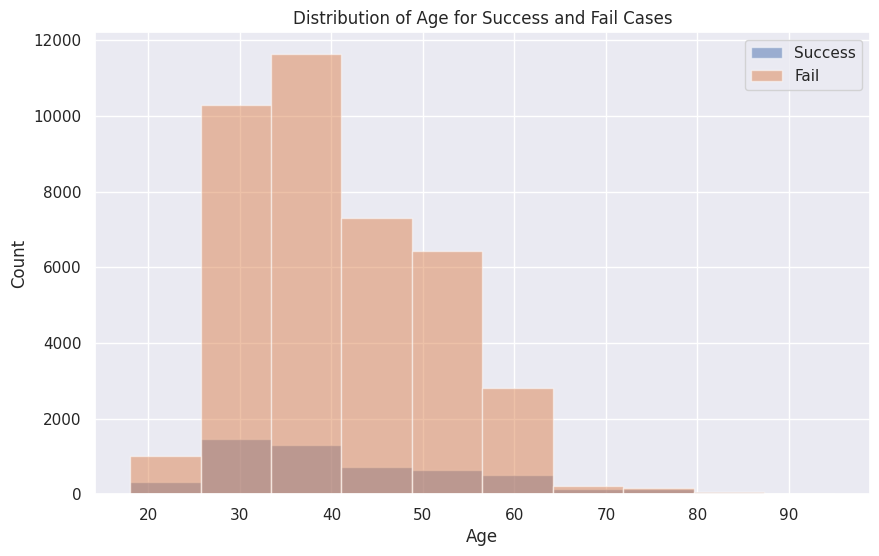

In [ ]:
print("The answer is B. Distributions intersect significantly, the bigger the age, the bigger the success.")

success_data = df[df['y'] == 1]
fail_data = df[df['y'] == 0]

plt.figure(figsize=(10, 6))
plt.hist(success_data['age'], bins=10, alpha=0.5, label='Success')
plt.hist(fail_data['age'], bins=10, alpha=0.5, label='Fail')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Age for Success and Fail Cases')
plt.show()

## Q6
### Visualize the feature `duration` for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the duration matters.
- B. Distributions intersect significantly, the bigger the duration, the bigger the success.
- C. Distributions intersect significantly, the less the duration, the bigger the success.
- D. Distributions have almost no intersection, the bigger the duration, the bigger the success.

The answer is D. Distributions have almost no intersection, the bigger the duration, the bigger the success.


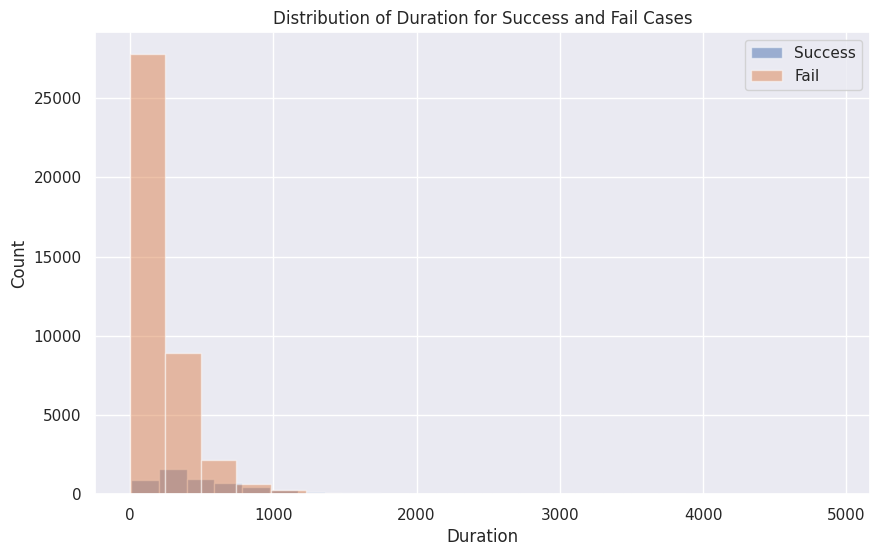

In [ ]:
print("The answer is D. Distributions have almost no intersection, the bigger the duration, the bigger the success.")

plt.figure(figsize=(10, 6))
plt.hist(success_data['duration'], bins=20, alpha=0.5, label='Success')
plt.hist(fail_data['duration'], bins=20, alpha=0.5, label='Fail')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Duration for Success and Fail Cases')
plt.show()

-----

## Q7
#### We need to define a list of numerical columns (not binary). How many numerical columns are there?

In [ ]:
# TODO define numerical columns
numerical_cols = list(vars[vars['type'] == 'Integer'].index)
print(f"Total non-binary numerical columns: {len(numerical_cols)}\n{sorted(numerical_cols)}")

Total non-binary numerical columns: 6
['age', 'balance', 'campaign', 'duration', 'pdays', 'previous']


-----
## Q8

#### Compute Pearson correlation coefficient between the target variable and:
#### 8.1 `balance`
#### 8.2 `age`
#### 8.3 `duration`
#### 8.4 `pdays`
#### 8.5 What numerical feature has the highest Pearson correlation with the target variable?

In [ ]:
print(f"8.1 (balance): {df['balance'].corr(df['y'], method='pearson'):.3f}")
print(f"8.2 (age): {df['age'].corr(df['y'], method='pearson'):.3f}")
print(f"8.3 (duration): {df['duration'].corr(df['y'], method='pearson'):.3f}")
print(f"8.4 (pdays): {df['pdays'].corr(df['y'], method='pearson'):.3f}")

print(df[['balance', 'age', 'duration', 'pdays','y']].corr().drop(['balance', 'age', 'duration', 'pdays'], axis=1).drop('y', axis=0).sort_values('y', ascending=False))

print("'duration' has the highest Pearson correlation with 'y'")


8.1 (balance): 0.053
8.2 (age): 0.025
8.3 (duration): 0.395
8.4 (pdays): 0.104
                 y
duration  0.394521
pdays     0.103621
balance   0.052838
age       0.025155
'duration' has the highest Pearson correlation with 'y'


-----
## Q9
#### Visualize dependency of numerical data with success (target variable). Hint: look at seaborn `pairplot`. What do you think about it? Write your answer in the markdown cell in this notebook

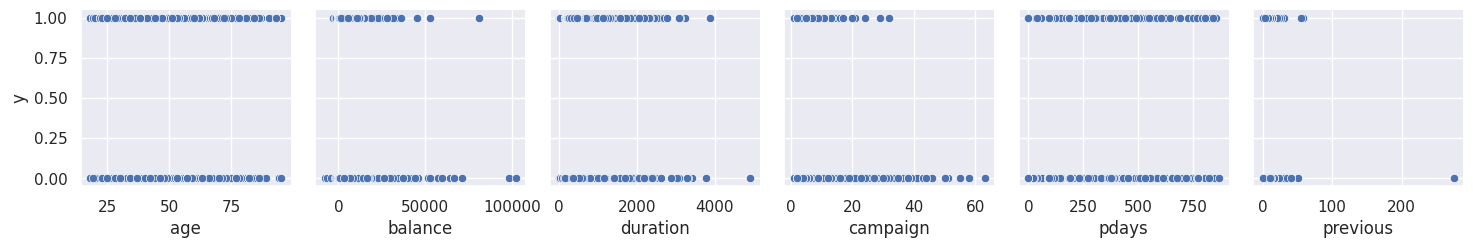

In [ ]:
import seaborn as sns
numerical_cols.append('y')
sns.pairplot(df[numerical_cols], y_vars=['y'], x_vars=numerical_cols[:-1])
numerical_cols.remove('y')

### Q9 Answer

1. The visual analysis of the **day_of_week** plot reveals no discernible pattern, indicating that the day of the week does not appear to have a substantial influence on the success rate.
2. Customers with **higher account balances** and those contacted **more frequently** during the marketing campaign seem to exhibit a **lower likelihood** of accepting the term deposit offer.
3. Correlations for other variables, such as **age, duration, pdays, and previous**, do not exhibit a clear and significant impact on the outcome of the campaign, making it challenging to establish their role in determining success.

## Q10 Feature generation
Lets' generate some more features that could be useful.

#### Create a binary column that would hold the info if the person was contacted before (use column `pdays`). How many people were not contacted earlier?

In [ ]:
df['contacted'] = (df['pdays'] != -1).apply(lambda x: 1 if x==True else 0)
df.contacted.value_counts()

0    36954
1     8257
Name: contacted, dtype: int64

------
-----
# Preprocessing

## Q11
Drop the leaking column with target variable from your dataframe (if you have added it earlier).

#### How many columns do you have now?

In [ ]:
if 'y' in df.columns:
  y = df['y']
  df.drop('y', axis=1, inplace=True)

len(df.columns)

17

-----
## Q12
Add one-hot labels for categorical columns. For a column with $k$ categories you should keep $k - 1$ one-hot columns.

Drop the initial categorical columns from the DataFrame.

#### How many resulting columns in a DataFrame do you have after this operation?

In [ ]:
# TODO add one-hot labels and drop columns
vars.drop('y', axis=0, inplace=True)
categorical_columns = list(vars[vars['type'].isin(['Categorical', 'Date', 'Binary'])].index)  # Add your column names
print(categorical_columns)
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(f"Q12: {len(df.columns)}")

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'month', 'poutcome']
Q12: 72


## Q13
Split the dataset without stratification and with random state 42 and test size 0.2.
#### How many of successful deposit subsciptions are in train set?

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape}{y_train.shape}")
print(f"Test: {X_test.shape}{y_test.shape}")
print(f"{y_train.value_counts()}")

Train: (36168, 72)(36168,)
Test: (9043, 72)(9043,)
0    31970
1     4198
Name: y, dtype: int64


## Q14 Feature selection
Scale the numeric columns with standard scaler
#### What is median value in `duration` field after scaling?

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
print(f"Q14: {X_train['duration'].median():.3f}")

Q14: -0.299


## Q15 Estimate feature importance by Anova
#### What are the three most important features by anova with f classifier?

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

fs = SelectKBest(score_func=f_classif, k=3)
fs.fit(X_train, y_train)

X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

selected_feature_indices = fs.get_support(indices=True)
top_features = X_train.columns[selected_feature_indices]

print(f"Q15: {sorted(top_features)}")

Q15: ['contacted', 'duration', 'poutcome_success']


------

## Q16 Logistic regression
Build a model with logistic regression.
Use l2 penalty and search for optimal C in `np.logspace(-2, 4, 7)`, set `max_iter = 400`.

#### Q16.1 What is an optimal C for l2 regularization?
#### Q16.2 What is the accuracy for this params?
#### Q16.3 What is the three most important features by logistic regression estimation?
#### Q16.4 Build roc curve and calculate roc-auc score. What is the roc-auc score?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [ ]:
logistic_regression = LogisticRegression(penalty='l2', max_iter=400)

param_grid = {'C': np.logspace(-2, 4, 7)}

grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Q16.1: Optimal C for L2 regularization
optimal_C = grid_search.best_params_['C']

# Q16.2: Accuracy for this optimal C
lr = grid_search.best_estimator_
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Q16.3: Three most important features by logistic regression estimation

coef_abs = np.abs(lr.coef_[0])
top_feature_indices = np.argsort(coef_abs)[::-1][:3]
top_features = X_train.columns[top_feature_indices]

# Q16.4: Build ROC curve and calculate ROC-AUC score
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Q16.1: Optimal C for L2 regularization: {optimal_C}")
print(f"Q16.2: Accuracy for this optimal C: {accuracy:.3f}")
print(f"Q16.3: Three most important features by logistic regression estimation: {sorted(list(top_features))}")
print(f"Q16.4: ROC-AUC score: {roc_auc:.3f}")

Q16.1: Optimal C for L2 regularization: 1000.0
Q16.2: Accuracy for this optimal C: 0.901
Q16.3: Three most important features by logistic regression estimation: ['contact_unknown', 'month_mar', 'poutcome_success']
Q16.4: ROC-AUC score: 0.907


------

## Q17 Random forest
Build a random forest model.
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`
#### Q17.1 What is an optimal depth and number of trees?
#### Q17.2 What is the roc-auc for this params?
#### Q17.3 Build precision-recall curve. What is the highest precision for recall >0.5?
#### Q17.4 Build precision-recall curve. What is the highest recall for precision >0.5?
#### Q17.5 Build precision-recall curve. What is the precision for binarization threshold=0.3?
#### Q17.6 Build precision-recall curve. What is the recall for binarization threshold=0.3?
#### Q17.7 What is the three most important features by random forest?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc

param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': list(range(2, 16))
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Q17.1: Optimal depth and number of trees
optimal_depth = grid_search.best_params_['max_depth']
optimal_n_estimators = grid_search.best_params_['n_estimators']

# Create the best model with optimal hyperparameters
rf = grid_search.best_estimator_

# Q17.2: ROC-AUC for the optimal parameters
y_prob = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

# Q17.3: Precision-Recall Curve - Highest precision for recall > 0.5
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
prc_auc = auc(recall, precision)
high_precision = max(precision[recall > 0.5])

# Q17.4: Precision-Recall Curve - Highest recall for precision > 0.5
high_recall = max(recall[precision > 0.5])

# Q17.5: Precision-Recall Curve - Precision for binarization threshold = 0.3
threshold_idx = np.argmax(thresholds >= 0.3)
precision_at_threshold = precision[threshold_idx]

# Q17.6: Precision-Recall Curve - Recall for binarization threshold = 0.3
recall_at_threshold = recall[threshold_idx]

# Q17.7: Three most important features by Random Forest
feature_importances = rf.feature_importances_
top_feature_indices = np.argsort(feature_importances)[::-1][:3]
top_features = df.columns[top_feature_indices]

print(f"Q17.1: Optimal depth and number of trees - Depth: {optimal_depth}, Estimators: {optimal_n_estimators}")
print(f"Q17.2: ROC-AUC for the optimal parameters: {roc_auc:.3f}")
print(f"Q17.3: Highest precision for recall > 0.5: {high_precision:.3f}")
print(f"Q17.4: Highest recall for precision > 0.5: {high_recall:.3f}")
print(f"Q17.5: Precision for binarization threshold = 0.3: {precision_at_threshold:.3f}")
print(f"Q17.6: Recall for binarization threshold = 0.3: {recall_at_threshold:.3f}")
print(f"Q17.7: Three most important features by Random Forest: {sorted(list(top_features))}")

Q17.1: Optimal depth and number of trees - Depth: 15, Estimators: 200
Q17.2: ROC-AUC for the optimal parameters: 0.925
Q17.3: Highest precision for recall > 0.5: 0.629
Q17.4: Highest recall for precision > 0.5: 0.781
Q17.5: Precision for binarization threshold = 0.3: 0.572
Q17.6: Recall for binarization threshold = 0.3: 0.656
Q17.7: Three most important features by Random Forest: ['duration', 'poutcome_success', 'age']


-----

## Q18 Feature selection
Select **top-30** features (by random forest model). Train random forest again with the same parameters of grid search.
#### 18.1 What is the roc-auc score for this model?
#### 18.2 What is the f1 score for this model?
#### 18.3 Does the classification quality improve after feature selection? What do you think? Please, answer here

In [ ]:
from sklearn.metrics import f1_score

top_feature_importances = rf.feature_importances_.argsort()[::-1][:30]

X_train_top_30 = X_train.iloc[:, top_feature_importances]
X_test_top_30 = X_test.iloc[:, top_feature_importances]

rf_top_30 = RandomForestClassifier(random_state=42)
grid_search_top_30 = GridSearchCV(rf_top_30, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_top_30.fit(X_train_top_30, y_train)

rf_top30 = grid_search_top_30.best_estimator_
rf_top30.fit(X_train_top_30, y_train)

# Q18.1: ROC-AUC score for the model with top 30 features
y_prob_top30 = rf_top30.predict_proba(X_test_top_30)[:, 1]
roc_auc_top30 = roc_auc_score(y_test, y_prob_top30)

# Q18.2: F1 score for the model with top 30 features
y_pred_top30 = rf_top30.predict(X_test_top_30)
f1_score_top30 = f1_score(y_test, y_pred_top30)

# Q18.3: Does the classification quality improve after feature selection?
# Compare ROC-AUC and F1 scores before and after feature selection
roc_auc_before = roc_auc
f1_score_before = f1_score(y_test, rf.predict(X_test))

classification_improved = roc_auc_top30 > roc_auc_before and f1_score_top30 > f1_score_before

print(f"Q18.1: ROC-AUC score for the model with top 30 features: {roc_auc_top30:.3f}")
print(f"Q18.2: F1 score for the model with top 30 features: {f1_score_top30:.3f}")
print(f"Q18.3: Does the classification quality improve after feature selection? {classification_improved}")


Q18.1: ROC-AUC score for the model with top 30 features: 0.921
Q18.2: F1 score for the model with top 30 features: 0.479
Q18.3: Does the classification quality improve after feature selection? False


The ROC-AUC score of the random forest model without feature selection is 0.925, while the ROC-AUC score of the model with the top 30 selected features is 0.921. So, our ROC-AUC score has decreased just a bit after top 30 feature selection. Although the difference is not significant, our score has decreased, which was not expected. Seems like the features except top 30 almost do not affect the score and overall classification.

------
## Q19 (2 points) Analysis
Analyze the resulting top-3 features of three previously considered methods. Are they consistent with each other. Are there any strange features among top features of any feature selection algorithm? Please, write your thoughts here.

----

### Q19 Answer:

- **ANOVA**: [duration, contacted, poutcome_success]
- **LogReg Estimation**: [poutcome_success, contact_unknown, month_mar]
- **RandomForest**: [age, duration, poutcome_success]

`poutcome_success`:
The outcome of the previous marketing campaign, specifically when it's a success, is a significant feature. This implies that past success strongly affects future outcomes. **This feature is common among all three methods and is consistent**. The success of the previous campaign is a strong predictor of future success.

 **ANOVA** and **RandomForest** also have `duration` feature in common.

`duration`:
Consistent with ANOVA, the duration of contact is a critical feature, indicating that it has a strong impact on the outcome.


All in all, there is some consistency in the top features, with `poutcome_success` being a common feature among all three methods. The inclusion of `duration` as a top feature in both **ANOVA** and **Random Forest** is also consistent. It's not necessarily strange to have diverse features in the top 3 lists, however, there are some variations, such as `contact_unknown` and `month_mar` found by Logistic Regression estimation, which are strange, especially `contact_unknown` being a nan-filled data in the contact column.

---

## Q20 Build the stronger model

#### 20.1 (3 points) Generate two (or more) meaningfull features.
Feel free to change the preprocessing, if you need it (eg. explicitly use categorical features for CatBoost).

Also, feel free to select features, etc. The pipeline is up to you.
#### (3 points) Train a gradient boosting, that beats random forest using:
#### 20.2 `XGBoost`
#### 20.3 `CatBoost`

In [ ]:
!pip install catboost

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Total Contacts (TotalContacted): overall level of engagement with the customer
df['TotalContacted'] = df['campaign'] + df['previous']

# Average Balance per Contact (AvgBalancePerContact): financial stability of customers relative to the number of times they've been contacted
df['AvgBalancePerContact'] = df['balance'] / (df['campaign'] + 1)  # Adding 1 to avoid division by zero

numerical_cols.append('AvgBalancePerContact')

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 20.2 Train an XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# 20.3 Train a CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)

accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
roc_auc_catboost = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])

# Compare models
print(f"XGBoost - Accuracy: {accuracy_xgb:.3f} ROC-AUC: {roc_auc_xgb:.3f} -- Better than RF? {roc_auc_xgb > roc_auc}")
print(f"CatBoost - Accuracy: {accuracy_catboost:.3f} ROC-AUC: {roc_auc_catboost:.3f} -- Better than RF? {roc_auc_catboost > roc_auc}")


XGBoost - Accuracy: 0.906 ROC-AUC: 0.927 -- Better than RF? True
CatBoost - Accuracy: 0.909 ROC-AUC: 0.935 -- Better than RF? True
